## Analysis of CDC data for Obesity

In [1]:
#Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.pyplot as mpl
import numpy as np

%matplotlib inline

## Import and Inspect Data

CDC data available between 9/2019 and 11/2019 changed. My first data set downloaded covered 2011-2015 and reported Fruit and Vegetable consumption for odd numbered years (2011,2013,2015). 

The data set I downloaded in November 2019 covered 2011-2018 but only had Fruit and Vegetable consumption for 2017. 

My first challenge is to union these two datasets and then remove duplicates so I can analyse data for 2011-2018

In [2]:
df_2015_raw = pd.read_csv("cdc_npao.csv")
df_2015_raw.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [3]:
df_2015_raw.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE


In [4]:
(df_2015_raw)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48767,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
48768,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
48769,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
48770,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Race/Ethnicity,Other,RACE,RACEOTH


In [4]:
df_2015_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48772 entries, 0 to 48771
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   48772 non-null  int64  
 1   YearEnd                     48772 non-null  int64  
 2   LocationAbbr                48772 non-null  object 
 3   LocationDesc                48772 non-null  object 
 4   Datasource                  48772 non-null  object 
 5   Class                       48772 non-null  object 
 6   Topic                       48772 non-null  object 
 7   Question                    48772 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             48772 non-null  object 
 10  Data_Value                  44169 non-null  float64
 11  Data_Value_Alt              44169 non-null  float64
 12  Data_Value_Footnote_Symbol  4603 non-null   object 
 13  Data_Value_Footnote         460

# Data Cleansing

## Identify and remove uneeded and/or duplicated columns 

There is one field *Data_Value_Unit* that has all nulls.

The *Data_Value* field contains the value corresponding to the *Question*.

There is a column field *Total* that only contains summarized values and there are additional columns that contain data only for the stratified categories.

Several fields have null values, based on the way the data is organized. The dataset as downloaded is both 'long' and 'wide' containing columns for each category (*Gender, Education, Income, Age, Race/Ethnicity, Total*) and columns of the categories (*StratificationCategory1,StratificationId1*).

In [5]:
(df_2015_raw
     .filter(['YearStart','YearEnd','LocationAbbr','LocationDesc','Data_Value_Type','Data_Value','Total','Age','Gender','ClassID','QuestionID','Question','StratificationCategory1','Stratification1','StratificationCategoryId1','StratificationID1'])
     .head(5)
    )

,YearStart,YearEnd,LocationAbbr,LocationDesc,Data_Value_Type,Data_Value,Total,Gender,ClassID,QuestionID,Question,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Value,32.0,Total,NaN,OWS,Q036,Percent of adults aged 18 years and older who ...,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Value,32.3,NaN,Male,OWS,Q036,Percent of adults aged 18 years and older who ...,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Value,31.8,NaN,Female,OWS,Q036,Percent of adults aged 18 years and older who ...,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Value,33.6,NaN,NaN,OWS,Q036,Percent of adults aged 18 years and older who ...,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Value,32.8,NaN,NaN,OWS,Q036,Percent of adults aged 18 years and older who ...,Education,High school graduate,EDU,EDUHSGRAD


The fields *YearStart* and *YearEnd* contain the start and end date of the survey. As they are the same value in this dataset I will add a field called *Year* and remove them.

For example the *Stratification..* & *Stratification..Id1*  columns contain similar information and can be removed.

Several of the fields can be removed.

In [6]:
#------------------------------------
# INSPECT FIELDS FOR REMOVING 
#------------------------------------

# INSPECT 'Year','Stratification..'
(df_2015_raw
     .filter(['YearStart','YearEnd''StratificationCategory1','Stratification1', 'StratificationCategoryId1', 'StratificationID1'])
    )

,YearStart,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Total,OVR,OVERALL
1,2011,Male,GEN,MALE
2,2011,Female,GEN,FEMALE
3,2011,Less than high school,EDU,EDUHS
4,2011,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...
48767,2015,Hawaiian/Pacific Islander,RACE,RACEHPI
48768,2015,Non-Hispanic Black,RACE,RACEBLK
48769,2015,Non-Hispanic White,RACE,RACEWHT
48770,2015,Other,RACE,RACEOTH


The fields *Data_Value_Type, Data_Value_Alt, Data_Value_Footnote_Symbol* are all either null, contain the same value, while *Data_Value_Footnote_Symbol* indicates that *Data_Value_Footnote* has contents.

The *Confidence_Limit* fields will not be used for this analysis and can be removed.

In [7]:
#------------------------------------
# INSPECT FIELDS FOR REMOVING 
#------------------------------------

# INSPECT 'DATA...'
(df_2015_raw
     .filter(['Data_Value_Unit', 'Data_Value_Type','Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit '])
    )

,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit
0,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5
1,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7
2,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6
3,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6
4,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6
...,...,...,...,...,...,...,...,...
48767,NaN,Value,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN
48768,NaN,Value,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN
48769,NaN,Value,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN
48770,NaN,Value,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN


The fields *ClassID, TopicID* are all *OWS* for *Obesity Weight Survey* and can be filtered out.

The data in the *QuestionID, DataValueTypeID, LocationID* is either repeated elsewhere or will not be used and can also be filtered out..

In [8]:
#------------------------------------
# INSPECT FIELDS FOR REMOVING 
#------------------------------------

# INSPECT '...ID'
(df_2015_raw
     .filter(['ClassID', 'TopicID', 'QuestionID','DataValueTypeID', 'LocationID'])
    )

,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID
0,OWS,OWS1,Q036,VALUE,1
1,OWS,OWS1,Q036,VALUE,1
2,OWS,OWS1,Q036,VALUE,1
3,OWS,OWS1,Q036,VALUE,1
4,OWS,OWS1,Q036,VALUE,1
...,...,...,...,...,...
48767,OWS,OWS1,Q037,VALUE,72
48768,OWS,OWS1,Q037,VALUE,72
48769,OWS,OWS1,Q037,VALUE,72
48770,OWS,OWS1,Q037,VALUE,72


In [9]:
#------------------------------------
# INSPECT FIELDS FOR REMOVING 
#------------------------------------

# INSPECT 

(df_2015_raw
    .filter(['Class','Topic','GeoLocation'])
    )

,Class,Topic,GeoLocation
0,Obesity / Weight Status,Obesity / Weight Status,"(32.84057112200048, -86.63186076199969)"
1,Obesity / Weight Status,Obesity / Weight Status,"(32.84057112200048, -86.63186076199969)"
2,Obesity / Weight Status,Obesity / Weight Status,"(32.84057112200048, -86.63186076199969)"
3,Obesity / Weight Status,Obesity / Weight Status,"(32.84057112200048, -86.63186076199969)"
4,Obesity / Weight Status,Obesity / Weight Status,"(32.84057112200048, -86.63186076199969)"
...,...,...,...
48767,Obesity / Weight Status,Obesity / Weight Status,"(18.220833, -66.590149)"
48768,Obesity / Weight Status,Obesity / Weight Status,"(18.220833, -66.590149)"
48769,Obesity / Weight Status,Obesity / Weight Status,"(18.220833, -66.590149)"
48770,Obesity / Weight Status,Obesity / Weight Status,"(18.220833, -66.590149)"


In [284]:
df_2015_raw.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [10]:
#--------------------
# CREATE ARRAY FILTER
#--------------------

filter1 = ['Year','LocationAbbr', 'LocationDesc','Question', 'QuestionID',
       'Data_Value', 'Data_Value_Footnote',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'StratificationCategory1',
       'Stratification1']

In [11]:
#---------------
# FILTER DATASET
#---------------

df_2015 = (df_2015_raw
           .assign(Year=df_2015_raw.YearStart)
           .filter(filter1)
          )
df_2015.head(5)    

,Year,LocationAbbr,LocationDesc,Question,QuestionID,Data_Value,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,32.0,NaN,7304.0,Total,NaN,NaN,NaN,NaN,NaN,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,32.3,NaN,2581.0,NaN,NaN,NaN,Male,NaN,NaN,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,31.8,NaN,4723.0,NaN,NaN,NaN,Female,NaN,NaN,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,33.6,NaN,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,32.8,NaN,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate


## Repeat the data upload and filtering for the 2018 dataset

In [12]:
df_2018_raw = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
df_2018_raw.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [13]:
#---------------
# FILTER DATASET
#---------------

df_2018 = (df_2018_raw
           .assign(Year=df_2018_raw.YearStart)
           .filter(filter1)
          )
df_2018.head(5)    

,Year,LocationAbbr,LocationDesc,Question,QuestionID,Data_Value,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1
0,2012,WY,Wyoming,Percent of adults aged 18 years and older who ...,Q037,48.5,NaN,69,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,Race/Ethnicity,American Indian/Alaska Native
1,2012,DC,District of Columbia,Percent of adults aged 18 years and older who ...,Q036,31.6,NaN,243,NaN,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,35.2,NaN,598,NaN,25 - 34,NaN,NaN,NaN,NaN,Age (years),25 - 34
3,2013,US,National,Percent of adults who engage in no leisure-tim...,Q047,27.9,NaN,"266,452",NaN,NaN,NaN,Female,NaN,NaN,Gender,Female
4,2011,US,National,Percent of adults who engage in no leisure-tim...,Q047,16.9,NaN,"20,923",NaN,18 - 24,NaN,NaN,NaN,NaN,Age (years),18 - 24


## Reduce the datasets to only contain the rows with data for the 5 dimensions needed - Obesity, Overweight and Diet & Exercise

In [14]:
df_2018.Question.unique()


array(['Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combinatio

In [18]:
(df_2015['Question'].value_counts())

Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               7420
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          7420
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        7392
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)                                          

In [19]:
(df_2018['Question'].value_counts())

Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               12040
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          12040
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        12012
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)                                       

In [20]:
(df_2015['QuestionID'].value_counts())

Q037    7420
Q036    7420
Q047    7392
Q019    4424
Q044    4424
Q045    4424
Q043    4424
Q046    4424
Q018    4420
Name: QuestionID, dtype: int64

In [21]:
(df_2018['QuestionID'].value_counts())

Q037    12040
Q036    12040
Q047    12012
Q044     5964
Q045     5964
Q043     5964
Q046     5964
Q019     1540
Q018     1540
Name: QuestionID, dtype: int64

In [15]:
df_2018_reduced = df_2018.loc[df_2018['QuestionID'].isin(['Q018','Q019'])]
(df_2018_reduced
     .groupby(['Year','QuestionID'])
     .size()
)

Year  QuestionID
2017  Q018          1540
      Q019          1540
dtype: int64

In [16]:
df_2015_reduced = df_2015.loc[df_2015['QuestionID'].isin(['Q018','Q019'])]
(df_2015_reduced
     .groupby(['Year','Question','QuestionID'])
     .size()
)

Year  Question                                                                    QuestionID
2011  Percent of adults who report consuming fruit less than one time daily       Q018          1456
      Percent of adults who report consuming vegetables less than one time daily  Q019          1456
2013  Percent of adults who report consuming fruit less than one time daily       Q018          1456
      Percent of adults who report consuming vegetables less than one time daily  Q019          1456
2015  Percent of adults who report consuming fruit less than one time daily       Q018          1508
      Percent of adults who report consuming vegetables less than one time daily  Q019          1512
dtype: int64

## Focusing on Overweight/Obesity vs Weekly Exercise, Fruit, and Vegetable Consumption

In [17]:
df_2015_reduced = df_2015.loc[df_2015['QuestionID'].isin(['Q018','Q019','Q036','Q037','Q047'])]
(df_2015_reduced
     .groupby(['Year','Question','QuestionID'])
     .size()
)

Year  Question                                                                         QuestionID
2011  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
      Percent of adults who report consuming fruit less than one time daily            Q018          1456
      Percent of adults who report consuming vegetables less than one time daily       Q019          1456
2012  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
2013  Percent of adults aged 18 years and older who ha

In [18]:
df_2018_reduced = df_2018.loc[df_2018['QuestionID'].isin(['Q018','Q019','Q036','Q037','Q047'])]
(df_2018_reduced
     .groupby(['Year','Question','QuestionID'])
     .size()
)

Year  Question                                                                         QuestionID
2011  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
2012  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
2013  Percent of adults aged 18 years and older who have an overweight classification  Q037          1484
      Percent of adults aged 18 years and older who have obesity                       Q036          1484
      Percent of adults who engage in no leisure-time 

## Merge the two datasets to cover overcome the missing dietary data from 2011-2018 dataset

In [19]:
#Filter results for only the 5 basic questions, Overwieght/Obese, and diet and exercise habit

relevant_questions = ['Q018','Q019','Q036','Q037','Q047']
df_2015_Q = df_2015[df_2015.QuestionID.isin(relevant_questions)]
df_2018_Q = df_2018[df_2018.QuestionID.isin(relevant_questions)]

In [35]:
df_2015_Q.size(2)

,Year,LocationAbbr,LocationDesc,Question,QuestionID,Data_Value,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,32.0,NaN,7304.0,Total,NaN,NaN,NaN,NaN,NaN,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,Q036,32.3,NaN,2581.0,NaN,NaN,NaN,Male,NaN,NaN,Gender,Male


### What is the national obesity rate over the years 2011-2018

In [49]:
#Get data for National Obesity rates
df_US = df_2018_Q.query("LocationAbbr=='US' & QuestionID == 'Q036' & StratificationCategory1 =='Total'")
df_US = df_US[["Year","Data_Value"]].sort_values(by=['Year'])
df_US

,Year,Data_Value
30307,2011,27.4
33123,2012,27.7
23872,2013,28.3
28198,2014,28.9
29458,2015,28.9
3864,2016,29.6
21253,2017,30.1
12661,2018,30.9


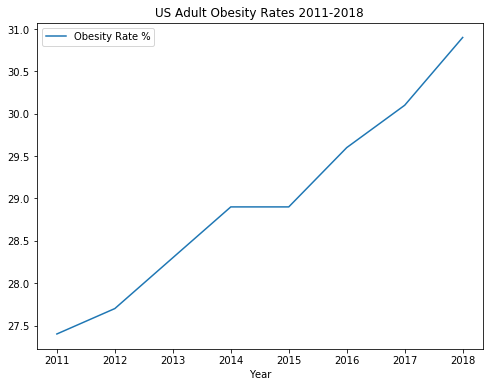

In [63]:
#Plot the line chart
ax = df_US.plot.line(y='Data_Value', x='Year', figsize=(8,6), label = 'Obesity Rate %').set_title('US Adult Obesity Rates 2011-2018')


In [65]:
#Incorporate Regions
#read regions.csv file
regions=pd.read_csv('regions.csv')
regions.head()


,Region,State
0,Midwest,Illinois
1,Midwest,Iowa
2,Midwest,Kansas
3,Midwest,Minnesota
4,Midwest,Missouri


In [114]:
#Concatonate the 2 datasets to explore the change in Obesity Rates by region

df_18 = df_2018_Q[~df_2018_Q.LocationAbbr.isin(['PR','VI','GU'])]

#Merge datasets 
df_18_regions=df_18.merge(regions, left_on='LocationDesc', right_on='State')
df_18_regions.head(2)

,Year,LocationAbbr,LocationDesc,Question,QuestionID,Data_Value,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1,Region,State
0,2012,WY,Wyoming,Percent of adults aged 18 years and older who ...,Q037,48.5,NaN,69,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,Race/Ethnicity,American Indian/Alaska Native,West,Wyoming
1,2012,WY,Wyoming,Percent of adults who engage in no leisure-tim...,Q047,32.3,NaN,484,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,Income,"Less than $15,000",West,Wyoming


In [115]:
#Get data for Regional Obesity rates by reducing the data set to Obesity and Totals for each state for each of the 8 years
df_18_regions = df_18_regions.query( "QuestionID == 'Q036' & Stratification1 =='Total'")
df_18_regions.head(2)

,Year,LocationAbbr,LocationDesc,Question,QuestionID,Data_Value,Data_Value_Footnote,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,StratificationCategory1,Stratification1,Region,State
77,2016,WY,Wyoming,Percent of adults aged 18 years and older who ...,Q036,27.7,NaN,"4,200",Total,NaN,NaN,NaN,NaN,NaN,Total,Total,West,Wyoming
159,2018,WY,Wyoming,Percent of adults aged 18 years and older who ...,Q036,29.0,NaN,"4,175",Total,NaN,NaN,NaN,NaN,NaN,Total,Total,West,Wyoming


In [118]:
#Selecting just the columns needed to calculate the proportion in each region based on the % and Sample Size
df_18_regions= df_18_regions[["Year","Data_Value","Region","Sample_Size","State"]]

In [124]:
#Convert Sample_Size field from string with comma "4,200" to float
df_18_regions.Sample_Size = df_18_regions.Sample_Size.str.replace(',', '').astype(float)

In [130]:
#Deriving the quanity within each state that is obese 
df_18_regions['Obese_Count'] = df_18_regions.Sample_Size *  (df_18_regions.Data_Value/100)
df_18_regions.head(4)

,Year,Data_Value,Region,Sample_Size,State,Obese_Count
77,2016,27.7,West,4200.0,Wyoming,1163.40
159,2018,29.0,West,4175.0,Wyoming,1210.75
253,2015,29.0,West,5010.0,Wyoming,1452.90
254,2011,25.0,West,6565.0,Wyoming,1641.25


In [131]:
#Selecting just the columns needed to calculate the proportion in each region based on the % and Sample Size
df_18_regions= df_18_regions[["Year","Obese_Count","Region","Sample_Size"]]
df_18_regions.head(4)

,Year,Obese_Count,Region,Sample_Size
77,2016,1163.40,West,4200.0
159,2018,1210.75,West,4175.0
253,2015,1452.90,West,5010.0
254,2011,1641.25,West,6565.0


In [142]:
df =df_18_regions.groupby(["Year","Region"]).sum().reset_index()
df

,Year,Region,Obese_Count,Sample_Size
0,2011,Midwest,29211.559,102622.0
1,2011,Northeast,36422.244,137150.0
2,2011,South,35241.257,115826.0
3,2011,West,28265.881,115102.0
4,2012,Midwest,24464.809,84462.0
5,2012,Northeast,39290.843,146090.0
6,2012,South,32278.385,103807.0
7,2012,West,26984.199,107871.0
8,2013,Midwest,29568.676,99643.0
9,2013,Northeast,37232.397,133973.0


In [144]:
df['Regional_Percent'] =  (df.Obese_Count/df.Sample_Size)*100
df=df.round(1)
df =df[["Year","Region","Regional_Percent"]]
df

,Year,Region,Regional_Percent
0,2011,Midwest,28.5
1,2011,Northeast,26.6
2,2011,South,30.4
3,2011,West,24.6
4,2012,Midwest,29.0
5,2012,Northeast,26.9
6,2012,South,31.1
7,2012,West,25.0
8,2013,Midwest,29.7
9,2013,Northeast,27.8


In [158]:
df_pivot= df.pivot(index='Year',columns='Region', values='Regional_Percent')
df_pivot.head()

Region,Midwest,Northeast,South,West
Year,,,,
2011,28.5,26.6,30.4,24.6
2012,29.0,26.9,31.1,25.0
2013,29.7,27.8,30.5,25.2
2014,30.4,28.2,31.7,26.4
2015,31.3,27.4,32.5,25.6


### For deeper Analysis the Comparison will be made of the metrics in the datasets of -15 and -18 of diet and exercise data

In [13]:
#Filter down the 2018 dataset to have just rows for 2016-2018
# Create list for years
years=[2016,2017,2018]

In [14]:
dataset_2 = df_2018_Q[df_2018_Q.Year.isin(years)]

In [104]:
dataset_2.groupby(['Year','Question','QuestionID']).size()


Year  Question                                                                         QuestionID
2016  Percent of adults aged 18 years and older who have an overweight classification  Q037          1540
      Percent of adults aged 18 years and older who have obesity                       Q036          1540
      Percent of adults who engage in no leisure-time physical activity                Q047          1540
2017  Percent of adults aged 18 years and older who have an overweight classification  Q037          1540
      Percent of adults aged 18 years and older who have obesity                       Q036          1540
      Percent of adults who engage in no leisure-time physical activity                Q047          1540
      Percent of adults who report consuming fruit less than one time daily            Q018          1540
      Percent of adults who report consuming vegetables less than one time daily       Q019          1540
2018  Percent of adults aged 18 years and older who ha

In [44]:
#Concatonate the 2 datasets
df_2011_18 = pd.concat([df_2015_Q,dataset_2])

In [121]:
df_2011_18.groupby(['Year','Question','QuestionID']).size()

Year  Question                                                                         QuestionID
2011  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
      Percent of adults who report consuming fruit less than one time daily            Q018          1456
      Percent of adults who report consuming vegetables less than one time daily       Q019          1456
2012  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
2013  Percent of adults aged 18 years and older who ha

In [122]:
df_2011_18.groupby(['Year','Question','QuestionID']).size()

Year  Question                                                                         QuestionID
2011  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
      Percent of adults who report consuming fruit less than one time daily            Q018          1456
      Percent of adults who report consuming vegetables less than one time daily       Q019          1456
2012  Percent of adults aged 18 years and older who have an overweight classification  Q037          1456
      Percent of adults aged 18 years and older who have obesity                       Q036          1456
      Percent of adults who engage in no leisure-time physical activity                Q047          1456
2013  Percent of adults aged 18 years and older who ha

## Drop remaining uneeded columns

In [45]:
drop_columns=['QuestionID','Total','Age(years)','Education','Gender','Income','Race/Ethnicity','Data_Value_Footnote']
df_2011_18.drop(drop_columns, axis=1,inplace=True)

In [359]:
df_2011_18.head(5)

,Year,LocationAbbr,LocationDesc,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,2581,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,4723,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,1153,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,2402,Education,High school graduate


In [143]:
df_2011_18.groupby(['Question']).size()

Question
Percent of adults aged 18 years and older who have an overweight classification    12040
Percent of adults aged 18 years and older who have obesity                         12040
Percent of adults who engage in no leisure-time physical activity                  12012
Percent of adults who report consuming fruit less than one time daily               5960
Percent of adults who report consuming vegetables less than one time daily          5964
dtype: int64

## Merge with Regions Names table

In [64]:
#read regions.csv file
regions=pd.read_csv('regions.csv')
regions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  51 non-null     object
 1   State   51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [47]:
#Remove outliers of GU, PR and VI
df_2011_18 = df_2011_18[~df_2011_18.LocationAbbr.isin(['PR','VI','GU'])]

#Merge datasets 
df_2011_18_regions=df_2011_18.merge(regions, left_on='LocationDesc', right_on='State')
df_2011_18_regions

,Year,LocationAbbr,LocationDesc,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,Region,State
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304,Total,Total,South,Alabama
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,2581,Gender,Male,South,Alabama
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,4723,Gender,Female,South,Alabama
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,1153,Education,Less than high school,South,Alabama
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,2402,Education,High school graduate,South,Alabama
...,...,...,...,...,...,...,...,...,...,...
45687,2017,WY,Wyoming,Percent of adults aged 18 years and older who ...,13.0,206,Age (years),18 - 24,West,Wyoming
45688,2017,WY,Wyoming,Percent of adults who engage in no leisure-tim...,NaN,NaN,Race/Ethnicity,Non-Hispanic Black,West,Wyoming
45689,2017,WY,Wyoming,Percent of adults aged 18 years and older who ...,38.3,373,Age (years),25 - 34,West,Wyoming
45690,2017,WY,Wyoming,Percent of adults aged 18 years and older who ...,NaN,NaN,Race/Ethnicity,Asian,West,Wyoming


In [48]:
#Remove field
df_2011_18_regions = df_2011_18_regions.drop('LocationDesc', axis=1)

In [28]:
## Replace Question column value with brief text
dct = {
    'Percent of adults aged 18 years and older who have an overweight classification':  'Overweight',
    'Percent of adults aged 18 years and older who have obesity':'Obese',
    'Percent of adults who engage in no leisure-time physical activity':'No physical activity',
    'Percent of adults who report consuming fruit less than one time daily':'Almost no fruit',
    'Percent of adults who report consuming vegetables less than one time daily':'Almost no vegetables'
}

df_2011_18_regions['Question'] = df_2011_18_regions['Question'].replace(dct)
df_2011_18_regions

,Year,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,Region,State
0,2011,AL,Obese,32.0,7304,Total,Total,South,Alabama
1,2011,AL,Obese,32.3,2581,Gender,Male,South,Alabama
2,2011,AL,Obese,31.8,4723,Gender,Female,South,Alabama
3,2011,AL,Obese,33.6,1153,Education,Less than high school,South,Alabama
4,2011,AL,Obese,32.8,2402,Education,High school graduate,South,Alabama
...,...,...,...,...,...,...,...,...,...
45687,2017,WY,Obese,13.0,206,Age (years),18 - 24,West,Wyoming
45688,2017,WY,No physical activity,NaN,NaN,Race/Ethnicity,Non-Hispanic Black,West,Wyoming
45689,2017,WY,Overweight,38.3,373,Age (years),25 - 34,West,Wyoming
45690,2017,WY,Overweight,NaN,NaN,Race/Ethnicity,Asian,West,Wyoming


# Insights

### Recreate Input and cleaning steps for easier repetition

In [1]:
#Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.pyplot as mpl
import numpy as np

%matplotlib inline

In [58]:
df_2015_raw = pd.read_csv("cdc_npao.csv")
df_2018_raw = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [59]:
#--------------------
# CREATE ARRAY FILTER
#--------------------

filter1 = ['Year','LocationAbbr', 'LocationDesc','Question', 'QuestionID',
       'Data_Value', 'Data_Value_Footnote',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'StratificationCategory1',
       'Stratification1']

In [60]:
df_2015 = (df_2015_raw
           .assign(Year=df_2015_raw.YearStart)
           .filter(filter1)
          )
df_2018 = (df_2018_raw
           .assign(Year=df_2018_raw.YearStart)
           .filter(filter1)
          )

In [5]:
df_2015_reduced = df_2015.loc[df_2015['QuestionID'].isin(['Q018','Q019'])]
df_2018_reduced = df_2018.loc[df_2018['QuestionID'].isin(['Q018','Q019'])]

In [6]:
#Filter results for only the 5 basic questions, Overwieght/Obese, and diet and exercise habit

relevant_questions = ['Q018','Q019','Q036','Q037','Q047']
df_2015_Q = df_2015[df_2015.QuestionID.isin(relevant_questions)]
df_2018_Q = df_2018[df_2018.QuestionID.isin(relevant_questions)]

In [7]:
#Filter down the 2018 dataset to have just rows for 2016-2018
# Create list for years
years=[2016,2017,2018]
dataset_2 = df_2018_Q[df_2018_Q.Year.isin(years)]

In [8]:
#Concatonate the 2 datasets
df_2011_18 = pd.concat([df_2015_Q,dataset_2])

In [9]:
drop_columns=['QuestionID','Total','Age(years)','Education','Gender','Income','Race/Ethnicity','Data_Value_Footnote']
df_2011_18.drop(drop_columns, axis=1,inplace=True)

In [10]:
#read regions.csv file
regions=pd.read_csv('regions.csv')


In [11]:
#Remove outliers of GU, PR and VI
df_2011_18 = df_2011_18[~df_2011_18.LocationAbbr.isin(['PR','VI','GU'])]

#Merge datasets 
df_2011_18_regions=df_2011_18.merge(regions, left_on='LocationDesc', right_on='State')

In [12]:
df_2011_18_regions.head(5)

,Year,LocationAbbr,LocationDesc,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,Region,State
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304,Total,Total,South,Alabama
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,2581,Gender,Male,South,Alabama
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,4723,Gender,Female,South,Alabama
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,1153,Education,Less than high school,South,Alabama
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,2402,Education,High school graduate,South,Alabama


In [12]:
#Remove field
df_2011_18_regions = df_2011_18_regions.drop('LocationDesc', axis=1)

In [13]:
## Replace Question column value with brief text
dct = {
    'Percent of adults aged 18 years and older who have an overweight classification':  'Overweight',
    'Percent of adults aged 18 years and older who have obesity':'Obese',
    'Percent of adults who engage in no leisure-time physical activity':'No physical activity',
    'Percent of adults who report consuming fruit less than one time daily':'Almost no fruit',
    'Percent of adults who report consuming vegetables less than one time daily':'Almost no vegetables'
}

df_2011_18_regions['Question'] = df_2011_18_regions['Question'].replace(dct)


## 2017 is the latest year with both exercise and diet data

Keep only 2017 for the initial Analysis

In [14]:
#Filter for only 2017 data
df_2017_regions=df_2011_18_regions[df_2011_18_regions.Year.isin([2017])]
#rename fields
df_2017_regions=df_2017_regions.rename(columns={"StratificationCategory1": "Category", "Stratification1": "Demographic","LocationAbbr":"Abbr","Data_Value":"Data"})
df_2017_regions.head(5)

,Year,Abbr,Question,Data,Sample_Size,Category,Demographic,Region,State
691,2017,AL,Overweight,30.2,"3,638",Gender,Female,South,Alabama
753,2017,AL,No physical activity,23.5,596,Age (years),25 - 34,South,Alabama
754,2017,AL,Almost no fruit,45.4,584,Age (years),25 - 34,South,Alabama
755,2017,AL,Overweight,35.5,"1,881",Education,High school graduate,South,Alabama
756,2017,AL,Almost no fruit,46.2,518,Income,"$25,000 - $34,999",South,Alabama


In [20]:
## Keep Totals
df_total= df_2017_regions.query('Category=="Total"')

#Keep only needed columns 'State'
df_total_State= df_total[['Question','Data','State']]
df_total_State.head(5)

,Question,Data,State
763,Almost no fruit,44.9,Alabama
768,Almost no vegetables,19.3,Alabama
784,No physical activity,32.0,Alabama
805,Overweight,33.9,Alabama
882,Obese,36.3,Alabama


In [21]:
#Pivot by Question for analysis
df_total_State= df_total_State.pivot(index='State',columns='Question', values='Data').reset_index()
df_total_State.head()

Question,State,Almost no fruit,Almost no vegetables,No physical activity,Obese,Overweight
0,Alabama,44.9,19.3,32.0,36.3,33.9
1,Alaska,36.9,19.0,20.6,34.2,32.6
2,Arizona,37.2,20.8,25.1,29.5,35.3
3,Arkansas,44.7,19.3,32.5,35.0,35.4
4,California,32.5,21.4,20.0,25.1,35.8


In [22]:

#Removing the column Overweight
df_total_State.drop(['Overweight'],axis=1,inplace=True)

#Removing the rows with NA
df_total_State = df_total_State.dropna()
df_total_State.head(5)

Question,State,Almost no fruit,Almost no vegetables,No physical activity,Obese
0,Alabama,44.9,19.3,32.0,36.3
1,Alaska,36.9,19.0,20.6,34.2
2,Arizona,37.2,20.8,25.1,29.5
3,Arkansas,44.7,19.3,32.5,35.0
4,California,32.5,21.4,20.0,25.1


## Pairplot of Diet & Exercise to Obesity

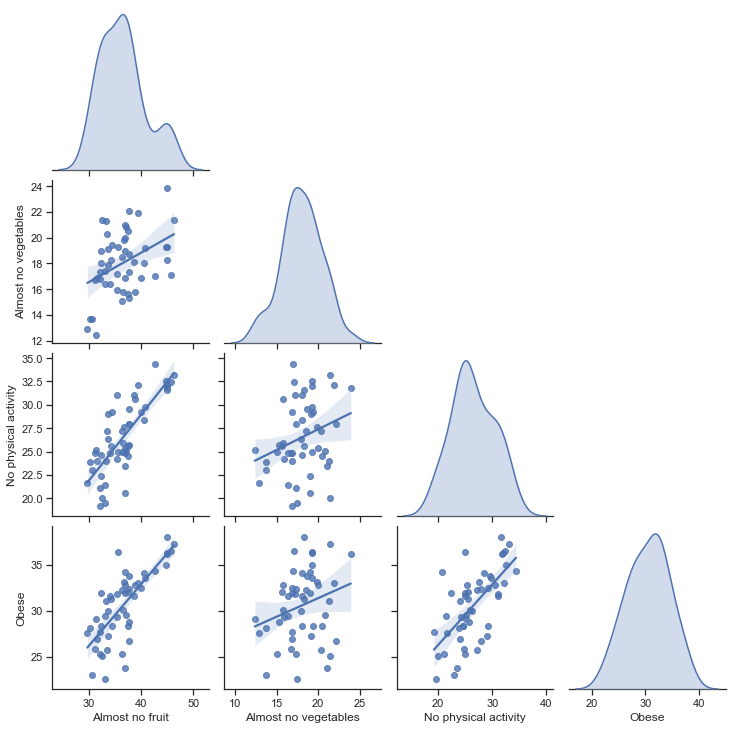

In [380]:
g=sns.pairplot(df_total_State, corner=True, diag_kind="kde", kind="reg")

#### Noteworthy:
   * Obesity looks very correlated with 'Almost no fruit'
   * Less so with No Physical Activity
   * No Fruit and No Physical Activity seem highly correlated

In [54]:
df_total_regions = df_total_State.merge(regions, left_on='State', right_on='State')
df_total_regions.head()

,State,Almost no fruit,Almost no vegetables,No physical activity,Obese,Region
0,Alabama,44.9,19.3,32.0,36.3,South
1,Alaska,36.9,19.0,20.6,34.2,West
2,Arizona,37.2,20.8,25.1,29.5,West
3,Arkansas,44.7,19.3,32.5,35.0,South
4,California,32.5,21.4,20.0,25.1,West


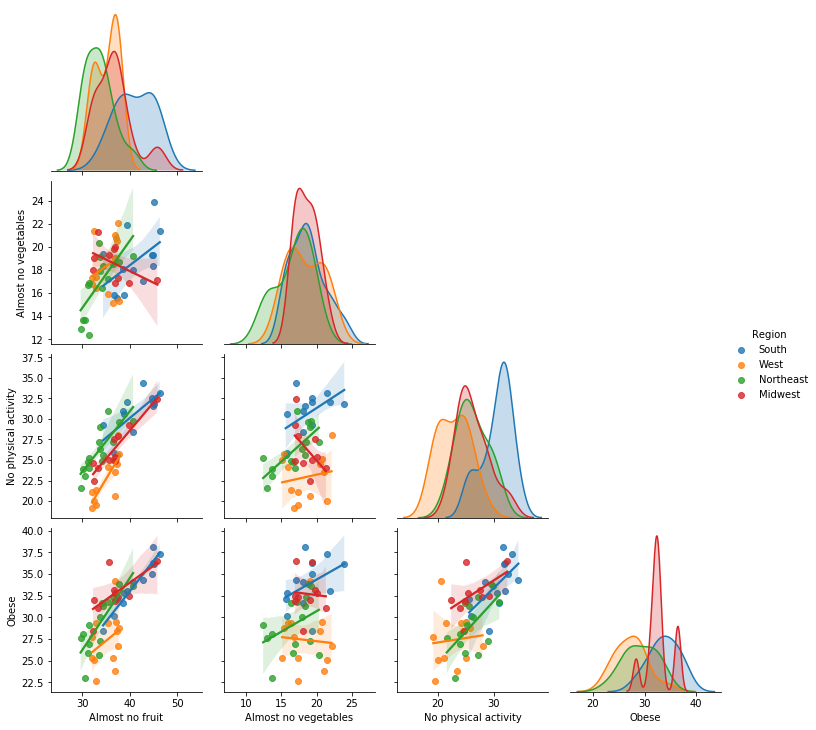

In [55]:
g=sns.pairplot(df_total_regions, corner=True, diag_kind="kde", kind="reg",hue="Region")

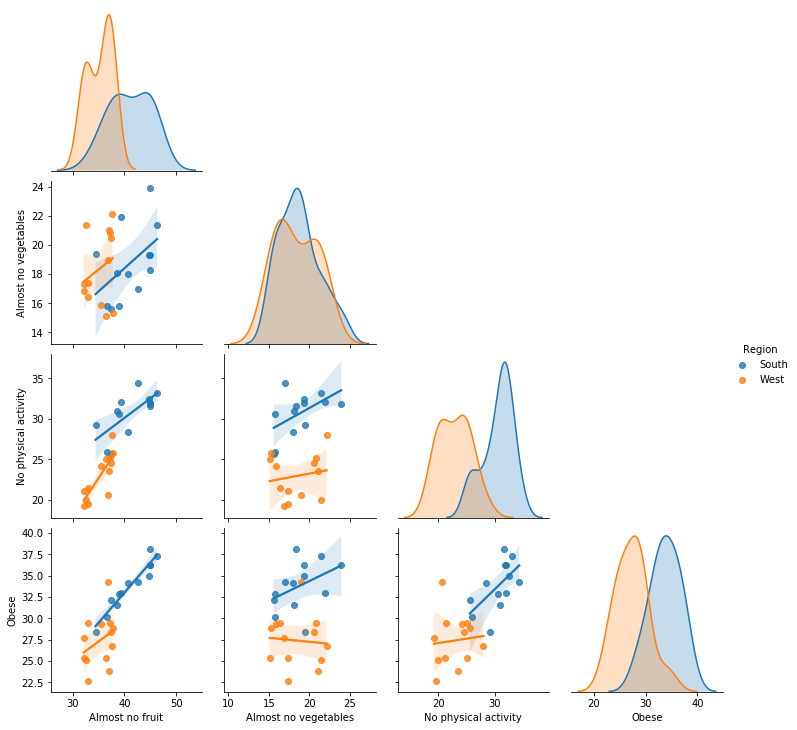

In [60]:
g=sns.pairplot(df_total_regions[df_total_regions.Region.isin(['South','West'])], corner=True, diag_kind="kde", kind="reg",hue="Region")

#### Noteworthy:
   * A clear distinction between the relationships of fruit in diet and obesity when comparing the South to the West

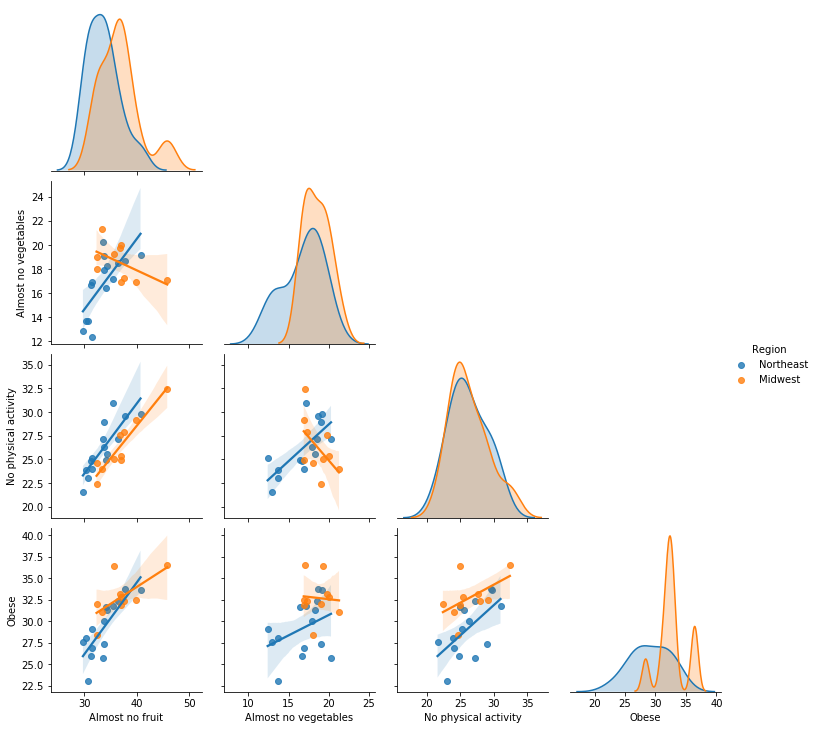

In [61]:
g=sns.pairplot(df_total_regions[df_total_regions.Region.isin(['Northeast','Midwest'])], corner=True, diag_kind="kde", kind="reg",hue="Region")

#### Noteworthy:
   * Northeast vs Midwest, shows a distinction between the relationships obesity and physical activities

## What is the Pearson's Correlation Coefficient for Obesity to Exercise and Diet

In [385]:
# compute correlation matrix using pandas corr() function
corr_df = df_total_State.corr(method='pearson')
corr_df.head(5)

Question,Almost no fruit,Almost no vegetables,No physical activity,Obese
Question,,,,
Almost no fruit,1.000000,0.407982,0.788701,0.753872
Almost no vegetables,0.407982,1.000000,0.277576,0.256126
No physical activity,0.788701,0.277576,1.000000,0.662556
Obese,0.753872,0.256126,0.662556,1.000000


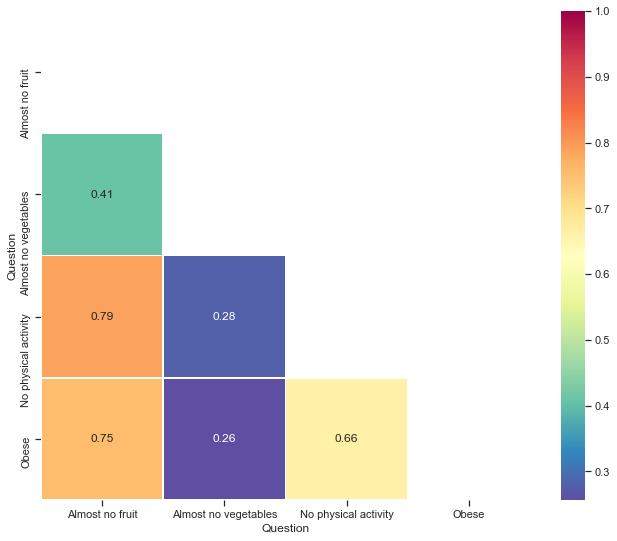

In [402]:
#Create mask for upper triangle
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)

#Create heat map Spectral color palette reversed 

f,ax = plt.subplots(figsize=(11,9))
ax= sns.heatmap(corr_df, mask=mask_ut,  annot=True, square=True, cmap="Spectral_r", linewidth=.6)

hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn_using_mask.png",
                    format='png',
                    dpi=150)

#### Pearsons Correlation gives high results for 
 * Nationaly No Fruit & No Physical Activity to Obesity rates have the highest correlations at 0.75 & 0.66 respectively

## Some focus on the South for Obesity and Correlation

In [66]:
corr_regions_df_South = df_total_regions[df_total_regions.Region.isin(['South'])].corr(method='pearson')
corr_regions_df_South.head(5)

,Almost no fruit,Almost no vegetables,No physical activity,Obese
Almost no fruit,1.000000,0.488653,0.700415,0.959745
Almost no vegetables,0.488653,1.000000,0.528285,0.410949
No physical activity,0.700415,0.528285,1.000000,0.601169
Obese,0.959745,0.410949,0.601169,1.000000


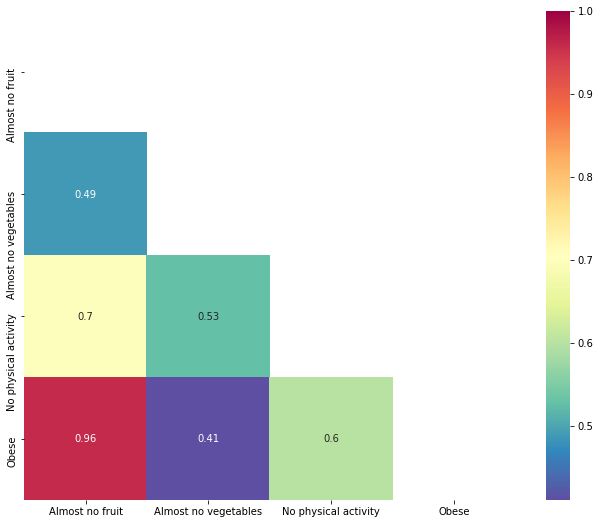

In [69]:
#Create mask for upper triangle
mask_ut=np.triu(np.ones(corr_regions_df_South.shape)).astype(np.bool)

#Create heat map Spectral color palette reversed 
f,ax = plt.subplots(figsize=(11,9))
hmap= sns.heatmap(corr_regions_df_South, mask=mask_ut, annot=True, cmap="Spectral_r")

hmap.figure.savefig("Correlation_Heatmap_South.png",
                    format='png',dpi=150)

#### In the South, Correlation gives high results for 
 * Almost No Fruit is by far the most highly correlated factor for Obesity rates at 0.95
 * There is also a high correlation between Almost No Fruit and Almost No Physical activity 

## Create Regression Model for Obesity against Exercise and Diet

In [303]:
#from statsmodels.formula.api import ol
import statsmodels.api as sm

df_regression= df_total_State.reset_index(drop=True)
dependentVar=df_regression['Obese']
regressionVar=df_regression.drop(['Obese','State'],axis=1)
regressionVar.head(5)
#df_regression.drop(drop_columns, axis=1,inplace=True)
#df_regression = df_total_State.filter

Question,Almost no fruit,Almost no vegetables,No physical activity
0,36.9,19.0,20.6
1,44.9,19.3,32.0
2,44.7,19.3,32.5
3,37.2,20.8,25.1
4,32.5,21.4,20.0


In [304]:
X = regressionVar
y = dependentVar
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Obese   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     23.44
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.50e-09
Time:                        15:03:23   Log-Likelihood:                -122.04
No. Observations:                  53   AIC:                             252.1
Df Residuals:                      49   BIC:                             260.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.2429      3.174      2.282      0.027       0.864      13.622
Almost no fruit          0.5705      0.141      4.061      0.000       0.288       0.853
Almost no vegetables    -0.1069      0.148     -0.724      0.472      -0.404       0.190
No physical activity     0.1664      0.149      1.118      0.269      -0.133       0.465
==============================================================================
Omnibus:                        2.276   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.482
Skew:                          -0.147   Prob(JB):                        0.477
Kurtosis:                       3.764   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model

R square for the whole country is 0.589

7.24  +  0.57 x *Almost_no_fruit*  -  0.11 x *Almost_no_veg*  +  0.17 x *No_physical_activity*

 # Boxplots

In [47]:
# Remove Overweight category to focus on Obesity Rates for each statification

df_2017_regions_obese = df_2017_regions[~df_2017_regions.Question.isin(['Overweight'])]
df_2017_regions_obese

,Year,Abbr,Question,Data,Sample_Size,Category,Demographic,Region,State
753,2017,AL,No physical activity,23.5,596,Age (years),25 - 34,South,Alabama
754,2017,AL,Almost no fruit,45.4,584,Age (years),25 - 34,South,Alabama
756,2017,AL,Almost no fruit,46.2,518,Income,"$25,000 - $34,999",South,Alabama
757,2017,AL,Almost no fruit,NaN,NaN,Race/Ethnicity,Asian,South,Alabama
759,2017,AL,No physical activity,28.7,"1,792",Education,Some college or technical school,South,Alabama
...,...,...,...,...,...,...,...,...,...
45685,2017,WY,Almost no fruit,41.0,571,Income,"$15,000 - $24,999",West,Wyoming
45686,2017,WY,Almost no fruit,36.4,381,Age (years),25 - 34,West,Wyoming
45687,2017,WY,Obese,13.0,206,Age (years),18 - 24,West,Wyoming
45688,2017,WY,No physical activity,NaN,NaN,Race/Ethnicity,Non-Hispanic Black,West,Wyoming


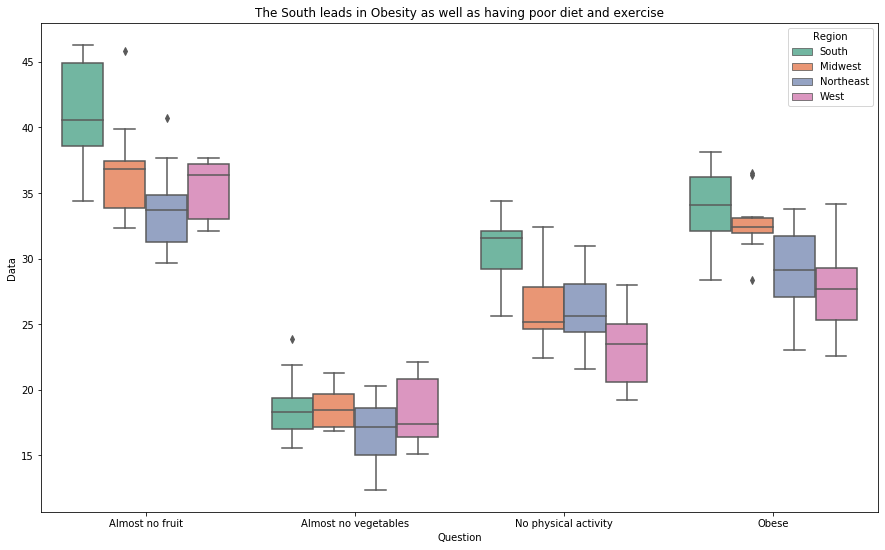

In [70]:
f,ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(
    x="Question", y="Data", hue="Region",
    hue_order = ["South","Midwest","Northeast","West"],
                 data=df_2017_regions_obese[df_2017_regions_obese.Category.isin(['Total'])], palette="Set2"
).set_title("The South leads in Obesity as well as having poor diet and exercise")

#### Obesity and Overweight Box/Whisker plots
   * The South leads in Obesity and lacks the lowest consumption of fruit and lowest physical activity

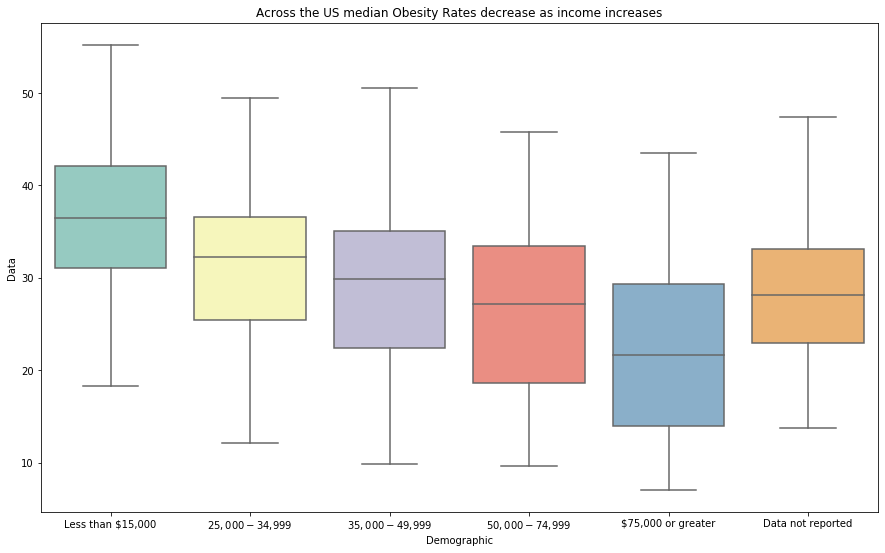

In [61]:
f,ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(
        x="Demographic", y="Data",
        data=df_2017_regions_obese[df_2017_regions_obese.Category.isin(['Income'])], palette="Set1",
        order=["Less than $15,000","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater","Data not reported"],
        ).set_title("Across the US median Obesity Rates decrease as income increases")

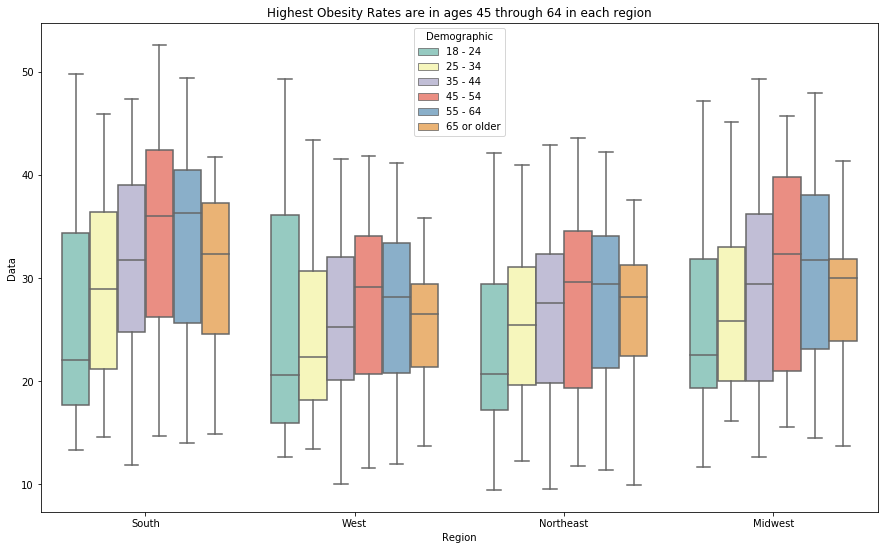

In [62]:
f,ax = plt.subplots(figsize=(15,9))

ax = sns.boxplot(x="Region", y="Data", hue="Demographic", 
                 hue_order = ["18 - 24","25 - 34","35 - 44","45 - 54","55 - 64","65 or older"],
                 data=df_2017_regions_obese[df_2017_regions_obese.Category.isin(['Age (years)'])], palette="Set3"
                #,order=["18 - 24","25 - 34","35 - 44","45 - 54","55 - 64","65 or older"]
                ).set_title("Highest Obesity Rates are in ages 45 through 64 in each region")


### In the below chart the South and Midwest show highest obesity rates at almost all income levels, while the West and Northeast have the lowest.



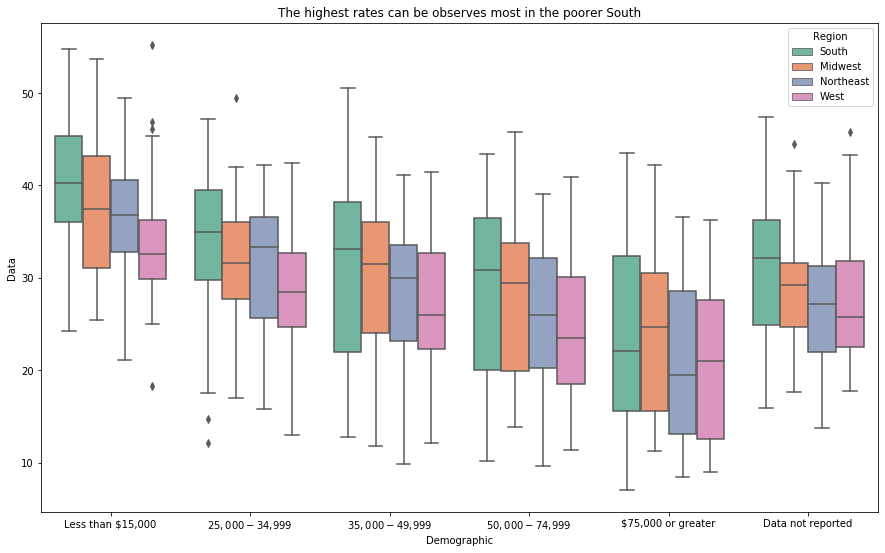

In [66]:
f,ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x="Demographic", y="Data", hue="Region",
                 hue_order = ["South","Midwest","Northeast","West"],
                 data=df_2017_regions_obese[df_2017_regions_obese.Category.isin(['Income'])], palette="Set2",
                order=["Less than $15,000","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",                       "Data not reported"]
                ).set_title("The highest rates can be observes most in the poorer South")


## In the chart below the Obesity Rates Decrease across all regions as Education Increases

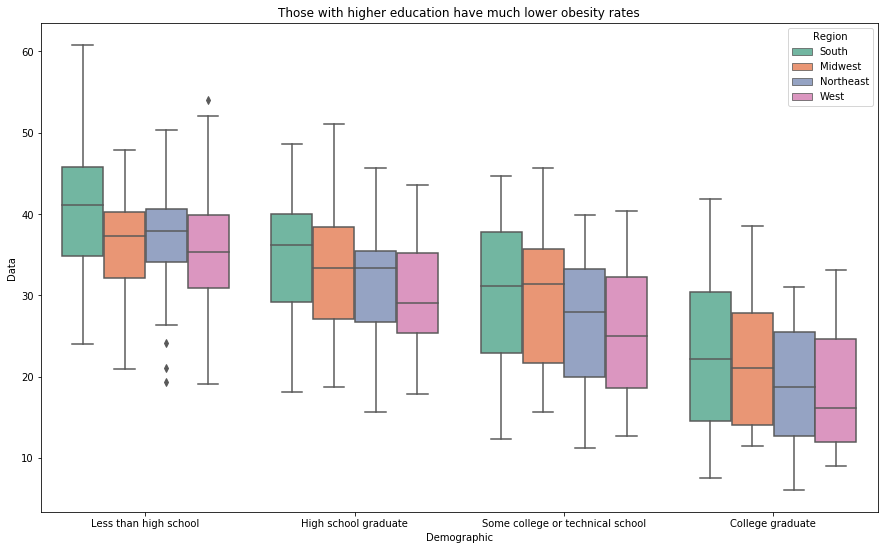

In [68]:
f,ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x="Demographic", y="Data", hue="Region",
                  hue_order = ["South","Midwest","Northeast","West"],
                 data=df_2017_regions_obese[df_2017_regions_obese.Category.isin(['Education'])], palette="Set2",
                order=["Less than high school","High school graduate","Some college or technical school","College graduate"]
                ).set_title("Those with higher education have much lower obesity rates")    

In [35]:
#filter totals for just Obese data

df_obese_demographics=df_2017_regions[df_2017_regions.Question.isin(['Obese'])]
df_obese_demographics

,Year,Abbr,Question,Data,Sample_Size,Category,Demographic,Region,State
772,2017,AL,Obese,33.6,"4,260",Race/Ethnicity,Non-Hispanic White,South,Alabama
773,2017,AL,Obese,38.6,109,Race/Ethnicity,2 or more races,South,Alabama
774,2017,AL,Obese,37.4,"3,638",Gender,Female,South,Alabama
776,2017,AL,Obese,38.8,735,Income,"$50,000 - $74,999",South,Alabama
792,2017,AL,Obese,34.4,75,Race/Ethnicity,Hispanic,South,Alabama
...,...,...,...,...,...,...,...,...,...
45664,2017,WY,Obese,32.1,"1,375",Education,Some college or technical school,West,Wyoming
45669,2017,WY,Obese,NaN,NaN,Race/Ethnicity,Asian,West,Wyoming
45673,2017,WY,Obese,31.3,"1,202",Education,High school graduate,West,Wyoming
45682,2017,WY,Obese,NaN,NaN,Race/Ethnicity,Other,West,Wyoming


In [74]:
#filter down to just demographic and state

df_demographics= df_obese_demographics[['State','Data','Demographic']]
df_demographics

,State,Data,Demographic
772,Alabama,33.6,Non-Hispanic White
773,Alabama,38.6,2 or more races
774,Alabama,37.4,Female
776,Alabama,38.8,"$50,000 - $74,999"
792,Alabama,34.4,Hispanic
...,...,...,...
45664,Wyoming,32.1,Some college or technical school
45669,Wyoming,NaN,Asian
45673,Wyoming,31.3,High school graduate
45682,Wyoming,NaN,Other


In [37]:
#drop NA

df_demographics = df_demographics.dropna()
df_demographics.head(5)

,State,Data,Demographic
772,Alabama,33.6,Non-Hispanic White
773,Alabama,38.6,2 or more races
774,Alabama,37.4,Female
776,Alabama,38.8,"$50,000 - $74,999"
792,Alabama,34.4,Hispanic


In [38]:
#Count to make sure only one state/demographic pair for upcoming pivot (no duplicate pairing value)

(df_demographics
     .groupby(['State','Demographic'])
     .size())

State    Demographic                     
Alabama  $15,000 - $24,999                   1
         $25,000 - $34,999                   1
         $35,000 - $49,999                   1
         $50,000 - $74,999                   1
         $75,000 or greater                  1
                                            ..
Wyoming  Less than high school               1
         Male                                1
         Non-Hispanic White                  1
         Some college or technical school    1
         Total                               1
Length: 1298, dtype: int64

In [39]:
#Reshape data to Wide

df_demographics_pivot= df_demographics.pivot(index='State',columns='Demographic', values='Data').reset_index()

df_demographics_pivot.drop('Total', axis=1,inplace=True)
df_demographics_pivot.drop('Hawaiian/Pacific Islander', axis=1,inplace=True)

df_demographics_pivot.head(5)

Demographic,State,"$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",18 - 24,2 or more races,25 - 34,35 - 44,...,Female,High school graduate,Hispanic,"Less than $15,000",Less than high school,Male,Non-Hispanic Black,Non-Hispanic White,Other,Some college or technical school
0,Alabama,40.4,37.0,38.3,38.8,31.9,20.7,38.6,36.3,42.2,...,37.4,37.1,34.4,42.2,41.2,35.1,44.4,33.6,NaN,36.3
1,Alaska,31.8,34.5,41.4,35.9,31.8,23.0,28.6,31.4,41.5,...,36.1,30.0,32.3,37.8,37.3,32.6,NaN,32.6,NaN,38.9
2,Arizona,34.3,27.8,30.4,30.5,25.0,18.2,34.4,30.5,34.4,...,28.8,32.8,35.4,35.5,33.9,30.1,34.3,26.9,31.2,30.3
3,Arkansas,40.0,36.8,36.3,35.1,32.2,13.3,24.6,38.8,41.8,...,37.4,34.6,28.5,39.3,38.7,32.8,45.0,34.0,NaN,38.5
4,California,28.3,32.3,25.7,25.6,21.8,12.7,37.7,22.6,25.4,...,25.8,28.7,31.7,30.8,34.0,24.5,33.7,23.8,28.1,28.0


In [41]:
#Create 'Wide' table of Demographic Obesity rates as field columns alongside each states Diet and Exercise activity

df_lifestyle_demo=df_total_State.merge(df_demographics_pivot, left_on='State', right_on='State')
df_lifestyle_demo.head(6)

,State,Almost no fruit,Almost no vegetables,No physical activity,Obese,"$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",...,Female,High school graduate,Hispanic,"Less than $15,000",Less than high school,Male,Non-Hispanic Black,Non-Hispanic White,Other,Some college or technical school
0,Alabama,44.9,19.3,32.0,36.3,40.4,37.0,38.3,38.8,31.9,...,37.4,37.1,34.4,42.2,41.2,35.1,44.4,33.6,NaN,36.3
1,Alaska,36.9,19.0,20.6,34.2,31.8,34.5,41.4,35.9,31.8,...,36.1,30.0,32.3,37.8,37.3,32.6,NaN,32.6,NaN,38.9
2,Arizona,37.2,20.8,25.1,29.5,34.3,27.8,30.4,30.5,25.0,...,28.8,32.8,35.4,35.5,33.9,30.1,34.3,26.9,31.2,30.3
3,Arkansas,44.7,19.3,32.5,35.0,40.0,36.8,36.3,35.1,32.2,...,37.4,34.6,28.5,39.3,38.7,32.8,45.0,34.0,NaN,38.5
4,California,32.5,21.4,20.0,25.1,28.3,32.3,25.7,25.6,21.8,...,25.8,28.7,31.7,30.8,34.0,24.5,33.7,23.8,28.1,28.0
5,Colorado,33.0,17.4,19.5,22.6,26.0,25.5,23.4,22.0,21.5,...,23.8,25.1,27.7,27.1,27.7,21.5,29.9,21.4,13.0,25.7


In [42]:
#create correlation coefficient of diet/exercise data combined with demographic data

corr_df_all = df_lifestyle_demo.corr(method='pearson')
corr_df_all.head(5)

,Almost no fruit,Almost no vegetables,No physical activity,Obese,"$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",18 - 24,...,Female,High school graduate,Hispanic,"Less than $15,000",Less than high school,Male,Non-Hispanic Black,Non-Hispanic White,Other,Some college or technical school
Almost no fruit,1.000000,0.407982,0.788701,0.753872,0.535145,0.422924,0.594502,0.673187,0.731351,0.605080,...,0.761987,0.517003,0.058456,0.471691,0.278060,0.647452,0.517010,0.587707,0.304493,0.691766
Almost no vegetables,0.407982,1.000000,0.277576,0.256126,-0.003548,0.037196,0.197282,0.209286,0.256933,0.238055,...,0.271282,0.142600,0.236876,0.118183,0.132044,0.210435,-0.000215,0.153902,0.262992,0.189493
No physical activity,0.788701,0.277576,1.000000,0.662556,0.610931,0.525200,0.492759,0.609920,0.582591,0.389897,...,0.609205,0.612464,0.010667,0.466008,0.317352,0.633354,0.514635,0.543573,0.095576,0.540454
Obese,0.753872,0.256126,0.662556,1.000000,0.812604,0.644387,0.869714,0.941103,0.897081,0.732863,...,0.942910,0.822453,0.355349,0.789115,0.573985,0.932658,0.670411,0.914523,0.488654,0.934408
"$15,000 - $24,999",0.535145,-0.003548,0.610931,0.812604,1.000000,0.682964,0.709194,0.748350,0.624079,0.564952,...,0.795935,0.858532,0.188878,0.738969,0.636238,0.722232,0.602290,0.736488,0.461017,0.774427


In [61]:
df_2017_regions.head()

,Year,Abbr,Question,Data,Sample_Size,Category,Demographic,Region,State
691,2017,AL,Overweight,30.2,"3,638",Gender,Female,South,Alabama
753,2017,AL,No physical activity,23.5,596,Age (years),25 - 34,South,Alabama
754,2017,AL,Almost no fruit,45.4,584,Age (years),25 - 34,South,Alabama
755,2017,AL,Overweight,35.5,"1,881",Education,High school graduate,South,Alabama
756,2017,AL,Almost no fruit,46.2,518,Income,"$25,000 - $34,999",South,Alabama


In [67]:
df_demographics.to_csv('df_demographics.csv', index = False, header=True)

In [63]:
df_obese_demographics=df_2017_regions[df_2017_regions.Question.isin(['Obese'])]
df_obese_demographics.head()

,Year,Abbr,Question,Data,Sample_Size,Category,Demographic,Region,State
772,2017,AL,Obese,33.6,"4,260",Race/Ethnicity,Non-Hispanic White,South,Alabama
773,2017,AL,Obese,38.6,109,Race/Ethnicity,2 or more races,South,Alabama
774,2017,AL,Obese,37.4,"3,638",Gender,Female,South,Alabama
776,2017,AL,Obese,38.8,735,Income,"$50,000 - $74,999",South,Alabama
792,2017,AL,Obese,34.4,75,Race/Ethnicity,Hispanic,South,Alabama


In [77]:
#filter down to just demographic and state

df_demographics_cat= df_obese_demographics[['State','Data','Demographic','Category']]
df_demographics_cat.head(5)

,State,Data,Demographic,Category
772,Alabama,33.6,Non-Hispanic White,Race/Ethnicity
773,Alabama,38.6,2 or more races,Race/Ethnicity
774,Alabama,37.4,Female,Gender
776,Alabama,38.8,"$50,000 - $74,999",Income
792,Alabama,34.4,Hispanic,Race/Ethnicity


In [66]:
df_demographics= df_obese_demographics[['State','Data','Demographic']].dropna()
df_demographics

,State,Data,Demographic
772,Alabama,33.6,Non-Hispanic White
773,Alabama,38.6,2 or more races
774,Alabama,37.4,Female
776,Alabama,38.8,"$50,000 - $74,999"
792,Alabama,34.4,Hispanic
...,...,...,...
45655,Wyoming,33.4,55 - 64
45659,Wyoming,36.1,"Less than $15,000"
45664,Wyoming,32.1,Some college or technical school
45673,Wyoming,31.3,High school graduate


In [95]:
#Write out data for quicker review / edit in Tableau Prep
df_2017_regions.to_csv('df_2017_regions.csv', index = False, header=True)

In [2]:
#Read data reshaped from Tableau Prep

Regional_Questions_Education = pd.read_csv("Regional_Questions_Education.csv")
National_Questions_Education = pd.read_csv("National_Questions_Education.csv")
Regional_Questions_Income = pd.read_csv("Regional_Questions_Income.csv")
National_Questions_Income = pd.read_csv("National_Questions_Income.csv")


In [3]:
#Create row and column orders
Question_Order = ['Obese','Almost no fruit','No physical activity','Almost no vegetables']
Region_Order = ['South','Midwest','Northeast','West']
Education_Order = ['Less than high school', 'High school graduate','Some college or technical school','College graduate']
Income_Order =["Less than $15,000","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater","Data not reported"]


In [4]:
#Assign Categorical Values Education
National_Questions_Education['Question']= pd.Categorical(National_Questions_Education['Question'],Question_Order)
Regional_Questions_Education['Question']= pd.Categorical(Regional_Questions_Education['Question'],Question_Order)
Regional_Questions_Education['Region']= pd.Categorical(Regional_Questions_Education['Region'],Region_Order)

#Assign Categorical Values Income
National_Questions_Income['Question']= pd.Categorical(National_Questions_Income['Question'],Question_Order)
Regional_Questions_Income['Question']= pd.Categorical(Regional_Questions_Income['Question'],Question_Order)
Regional_Questions_Income['Region']= pd.Categorical(Regional_Questions_Income['Region'],Region_Order)

In [5]:
Row_Sort = ['Question','Region']

#Sort Rows
National_Questions_Education = National_Questions_Education.sort_values(['Question'])
National_Questions_Income = National_Questions_Income.sort_values(['Question'])

Regional_Questions_Education = Regional_Questions_Education.sort_values(Row_Sort).set_index(Row_Sort)
Regional_Questions_Income = Regional_Questions_Income.sort_values(Row_Sort).set_index(Row_Sort)

In [6]:
#Sort Columns
National_Questions_Education=National_Questions_Education.reindex(columns=Education_Order)
Regional_Questions_Education=Regional_Questions_Education.reindex(columns=Education_Order)

National_Questions_Income=National_Questions_Income.reindex(columns=Income_Order)
Regional_Questions_Income=Regional_Questions_Income.reindex(columns=Income_Order)


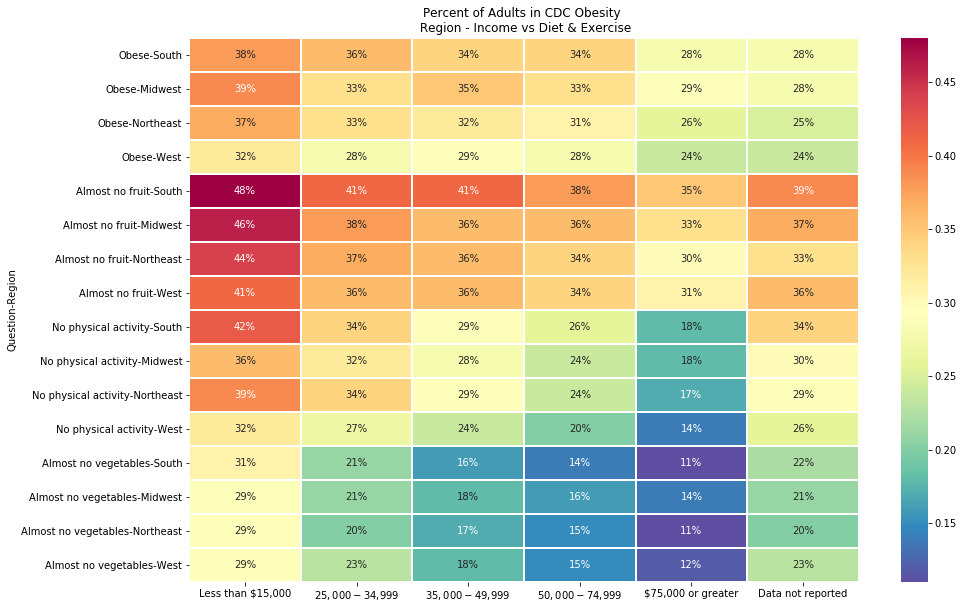

In [37]:
ax = plt.subplots(figsize=(15,10))
sns.heatmap(Regional_Questions_Income, linewidth=1, fmt=".0%", cmap="Spectral_r", annot=True).set_title('Percent of Adults in CDC Obesity \n Region - Income vs Diet & Exercise')

plt.show()


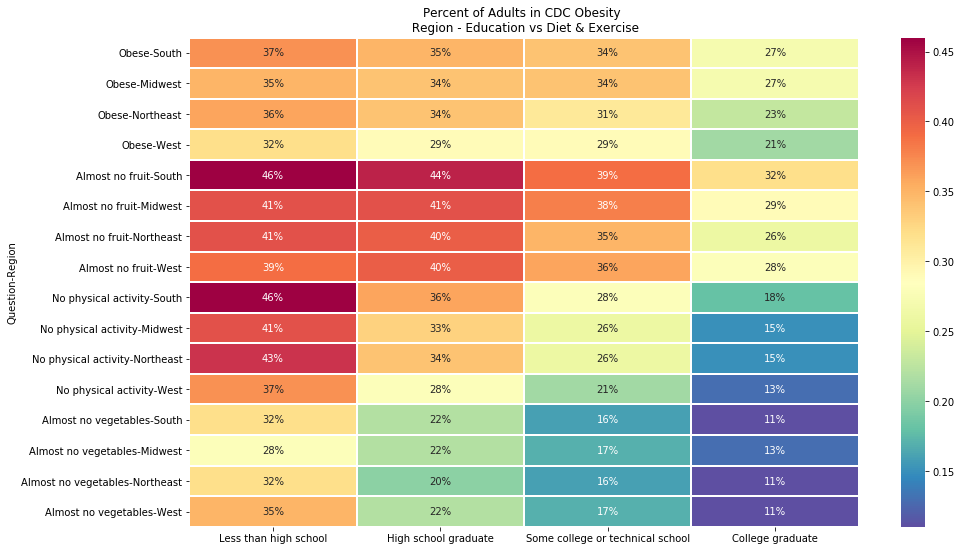

In [38]:
ax = plt.subplots(figsize=(15,9))
sns.heatmap(Regional_Questions_Education,  linewidth=1, fmt=".0%",cmap="Spectral_r", annot=True).set_title('Percent of Adults in CDC Obesity \n Region - Education vs Diet & Exercise')

plt.show()


### END